In [15]:
# 한글 깨짐 방지 코드
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
X,y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
logreg = LogisticRegression().fit(X_train,y_train)
print("test set score : {:.2f}".format(logreg.score(X_test,y_test)))

test set score : 0.88


#### 교차검증

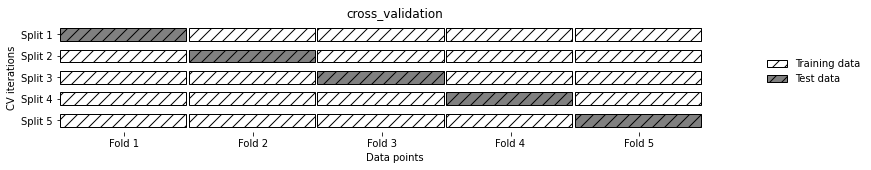

In [5]:
import mglearn
mglearn.plots.plot_cross_validation()

- scikit-learn 에서의 교차검증

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("cross validation score:", scores)
print("cross validation mean score:{:.3f}".format(scores.mean()))

cross validation score: [0.96666667 1.         0.93333333 0.96666667 1.        ]
cross validation mean score:0.973


In [17]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, cv=5, return_train_score=True)
display(res)

{'fit_time': array([0.04088759, 0.03191161, 0.03490806, 0.02792311, 0.02393293]),
 'score_time': array([0.        , 0.        , 0.        , 0.        , 0.00099826]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [22]:
import pandas as pd
import numpy as np
res_df = pd.DataFrame(res)
display(res_df)
print("평균 시간과 점수: \n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.040888,0.000000,0.966667,0.966667
1,0.031912,0.000000,1.000000,0.966667
2,0.034908,0.000000,0.933333,0.983333
3,0.027923,0.000000,0.966667,0.983333
4,0.023933,0.000998,1.000000,0.975000


평균 시간과 점수: 
 fit_time       0.031913
score_time     0.000200
test_score     0.973333
train_score    0.975000
dtype: float64


- 계층별 k-fold cross validation

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()
print("iris 레이블 : \n", iris.target)

iris 레이블 : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


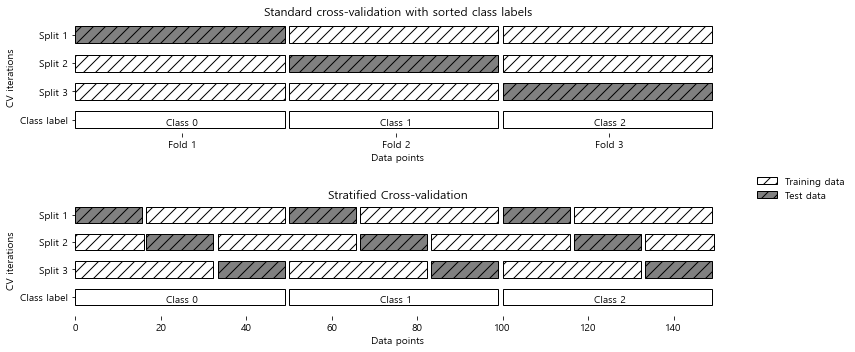

In [25]:
mglearn.plots.plot_stratified_cross_validation()

In [29]:
from sklearn.model_selection import KFold
Kfold = KFold(n_splits=5)

In [31]:
print("cross validation score:\n", cross_val_score(logreg, iris.data, iris.target, cv=Kfold))

cross validation score:
 [1.         1.         0.86666667 0.93333333 0.83333333]


In [34]:
Kfold = KFold(n_splits = 3)
print("cross validation score:\n", cross_val_score(logreg, iris.data, iris.target, cv=Kfold))

cross validation score:
 [0. 0. 0.]


In [37]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("교차 검증 점수:\n", cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [0.98 0.96 0.96]


- LOOCV

In [39]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("cross validation fold times: ", len(scores))
print("mean accuracy:{:.2f}".format(scores.mean()))

cross validation fold times:  150
mean accuracy:0.97


- 임의 분할 교차 검증

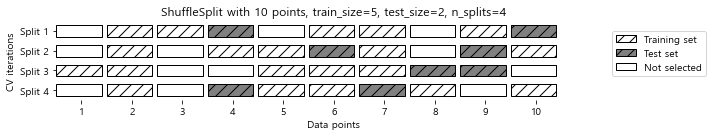

In [40]:
mglearn.plots.plot_shuffle_split()

In [41]:
# dataset의 50% train set / 50% test set
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("cross validation score:\n", scores)

cross validation score:
 [1.         0.96       0.97333333 0.96       0.96       0.98666667
 0.97333333 0.93333333 0.98666667 0.98666667]


- 그룹별 교차검증

group 배열에 train/test set을 만들 때 분리되지 않아야 할 그룹을 지정하는 것.

In [45]:
from sklearn.model_selection import GroupKFold
X,y = make_blobs(n_samples=12, random_state = 0)
# 처음 3개의 sample은 같은 그룹, 4개의 sample 그룹
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg,X,y, groups, cv=GroupKFold(n_splits=3))
print("cross validation score:\n", scores)

cross validation score:
 [0.75       0.6        0.66666667]


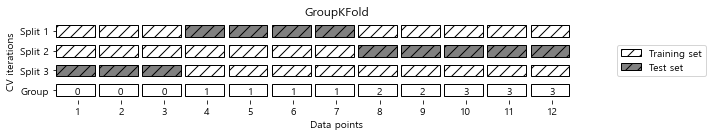

In [47]:
mglearn.plots.plot_group_kfold() 
# 한 그룹 전체가 train set이거나 test set

- 반복 교차 검증

In [48]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

In [53]:
# 검증 횟수 -> n_repeats x n_splits
from sklearn.model_selection import RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(logreg, iris.data,iris.target,cv=rskfold)
print("cross validation score:\n", scores)
print("cross validation mean score:{:.3f}".format(scores.mean()))


cross validation score:
 [1.         0.96666667 0.93333333 1.         0.93333333 0.96666667
 0.96666667 0.93333333 1.         0.96666667 0.93333333 1.
 1.         0.96666667 0.96666667 0.9        1.         1.
 0.93333333 0.96666667 0.93333333 0.96666667 0.96666667 1.
 0.96666667 1.         0.96666667 0.96666667 0.9        1.
 0.96666667 0.96666667 0.96666667 0.96666667 0.93333333 0.96666667
 0.96666667 1.         1.         0.9        0.96666667 1.
 0.9        0.96666667 0.96666667 0.9        0.96666667 0.96666667
 1.         0.96666667]
cross validation mean score:0.965


#### Grid Search

관심있는 매개변수들의 간으한 모든 조합을 시도